In [57]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import scienceplots
import numpy as np
plt.style.use(['science'])

2019-10-04 00:00:00 2020-03-18 20:54:00
 Missing Timestamps: DatetimeIndex(['2019-10-17 15:29:00', '2019-10-18 10:04:00',
               '2019-10-18 11:58:00', '2019-10-18 12:24:00',
               '2019-10-18 12:25:00', '2019-10-18 12:26:00',
               '2019-10-18 12:27:00', '2019-10-18 12:28:00',
               '2019-10-18 12:29:00', '2019-10-18 12:30:00',
               ...
               '2020-03-17 05:39:00', '2020-03-17 05:40:00',
               '2020-03-17 05:41:00', '2020-03-17 06:10:00',
               '2020-03-17 08:24:00', '2020-03-17 08:25:00',
               '2020-03-17 08:27:00', '2020-03-17 23:59:00',
               '2020-03-18 10:59:00', '2020-03-18 11:00:00'],
              dtype='datetime64[ns]', length=37965, freq=None)
2020-01-29    263
2020-01-30    282
2020-01-31    339
2020-02-01    316
2020-02-02    282
2020-02-03    294
2020-02-04      3
2020-02-05    275
2020-02-06    269
2020-02-07    269
2020-02-08    295
2020-02-09    274
2020-02-10    282
2020-02-11  

<Axes: xlabel='P_AC'>

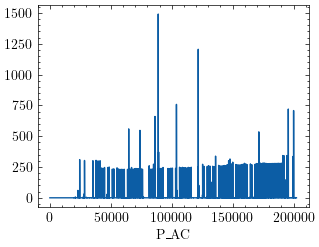

In [70]:
directory = "C:/Users/Robbe/PycharmProjects/SolNet 2/Brasil"
total_df = pd.DataFrame()
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if "inversor"in f:
        new_df = pd.read_csv(f, sep=',')
        total_df = pd.concat([total_df, new_df])

total_df = total_df.astype({'dia_mes_ano':'str', 'hora_minuto':'str'})
#total_df.loc[total_df['hora_minuto']]
total_df['hora_minuto'] = total_df['hora_minuto'].str.pad(6, side='left', fillchar='0') 
total_df = total_df.drop_duplicates(['dia_mes_ano', 'hora_minuto'])
total_df.index = pd.to_datetime(total_df['dia_mes_ano']+total_df['hora_minuto'], format="%Y%m%d%H%M%S")

total_df = total_df.drop(columns=['dia_mes_ano', 'hora_minuto'])


#04/10 - 16/10 only starts around 05:00 reindex it with 0
range = pd.date_range(start="2019-10-04 00:00:00", end="2019-10-17 00:00:00", freq='1min')
work=total_df[total_df.index.isin(range)]
total_df = total_df[~total_df.index.isin(range)]
work = work.reindex(range, fill_value=0)
total_df = pd.concat([work, total_df])

start = total_df.index.min()
end = total_df.index.max()
print(start, end)
expected_timestamps = pd.date_range(start=start, end=end, freq='1min')  # Assuming data is recorded every 15 minutes

missing_timestamps = expected_timestamps[~expected_timestamps.isin(total_df.index)]

if not missing_timestamps.empty:
    print(f" Missing Timestamps: {missing_timestamps}")
else:
    print(f"No missing chronological data.")

missing_df = pd.Series([1]*len(missing_timestamps), index=missing_timestamps)
day_sum = missing_df.groupby(missing_df.index.date).sum()
print(day_sum.tail(50)) #All days have missing data
groups = (missing_timestamps.to_series().diff() == pd.Timedelta(minutes=1)).cumsum().diff()
print(groups) #This gives if there are times where data missing is following each other, if not we can interpolate

df = total_df.reindex(expected_timestamps, axis=0)

conseq = df['P_AC'].isnull().astype(int).groupby(df['P_AC'].notnull().astype(int).cumsum()).sum()
print(conseq.head(50))
conseq.plot()
# total_df = total_df.interpolate(method='linear')

# missing_timestamps = expected_timestamps[~expected_timestamps.isin(total_df.index)]

# if not missing_timestamps.empty:
#     print(f" Missing Timestamps: {missing_timestamps}")
# else:
#     print(f"No missing chronological data.")

# total_df = total_df.resample('h').mean()
# total_df.head(50)


In [4]:
solar_generation = total_df['Solar Production (W)']

solar_generation.to_pickle('Data/CostaRica.pkl')

In [7]:
print(solar_generation.isna().sum())
print((solar_generation < 0).sum())

0
0
